In [13]:
#install necessary libraries
import sys
!{sys.executable} -m pip install numpy
import sys
!{sys.executable} -m pip install pandas 
import sys
!{sys.executable} -m pip install -U matplotlib
import sys
!{sys.executable} -m pip install -U seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 1.6 MB/s eta 0:00:00m eta 0:00:010:01


In [30]:
#import libraries, read the file and print the first 5 contents
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
file = input("Enter the name of the file") ##who_suicide_statistics.csv
#Suicide statistics from different cities in the world, based on year, sex, age, population
df = pd.read_csv(file, index_col = 'country')
country = df.groupby('country')
country
sex = df.groupby('sex')
age = df.groupby('age')
df.head()

Enter the name of the filewho_suicide_statistics.csv


,year,sex,age,suicides_no,population
country,,,,,
Albania,1985,female,15-24 years,NaN,277900.0
Albania,1985,female,25-34 years,NaN,246800.0
Albania,1985,female,35-54 years,NaN,267500.0
Albania,1985,female,5-14 years,NaN,298300.0
Albania,1985,female,55-74 years,NaN,138700.0


In [19]:
df.duplicated().sum()
#Lets see if there are any duplicates to take care of

3243

In [20]:
df.duplicated()
#Where are the duplicates?

country
Albania     False
Albania     False
Albania     False
Albania     False
Albania     False
            ...  
Zimbabwe    False
Zimbabwe    False
Zimbabwe    False
Zimbabwe    False
Zimbabwe    False
Length: 43776, dtype: bool

In [21]:
#Replace all NaN values with the means from that dataset
cols_with_nan = [col for col in df.columns if df.isna().sum()[col]>0]
for col in cols_with_nan:
    df[col] = df[col].fillna(df[col].mean())
df

,year,sex,age,suicides_no,population
country,,,,,
Albania,1985,female,15-24 years,193.31539,2.779000e+05
Albania,1985,female,25-34 years,193.31539,2.468000e+05
Albania,1985,female,35-54 years,193.31539,2.675000e+05
Albania,1985,female,5-14 years,193.31539,2.983000e+05
Albania,1985,female,55-74 years,193.31539,1.387000e+05
...,...,...,...,...,...
Zimbabwe,1990,male,25-34 years,150.00000,1.664091e+06
Zimbabwe,1990,male,35-54 years,132.00000,1.664091e+06
Zimbabwe,1990,male,5-14 years,6.00000,1.664091e+06


In [22]:
#Or, we can just drop the NaN values instead of having anything in them.
#Which approach is better?
fd = pd.read_csv(file, index_col = 'country')
fd.head()

,year,sex,age,suicides_no,population
country,,,,,
Albania,1985,female,15-24 years,NaN,277900.0
Albania,1985,female,25-34 years,NaN,246800.0
Albania,1985,female,35-54 years,NaN,267500.0
Albania,1985,female,5-14 years,NaN,298300.0
Albania,1985,female,55-74 years,NaN,138700.0


In [25]:
#Looks much cleaner, better approach than to consider data with NaN values at all (affects population as well)
fd = fd.dropna()
fd

,year,sex,age,suicides_no,population
country,,,,,
Albania,1987,female,15-24 years,14.0,289700.0
Albania,1987,female,25-34 years,4.0,257200.0
Albania,1987,female,35-54 years,6.0,278800.0
Albania,1987,female,5-14 years,0.0,311000.0
Albania,1987,female,55-74 years,0.0,144600.0
...,...,...,...,...,...
Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0
Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0
Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0


In [26]:
fd.describe()
#What does the data have?

,year,suicides_no,population
count,36060.000000,36060.000000,3.606000e+04
mean,1998.935441,221.809956,1.699996e+06
std,10.163883,855.449442,3.697811e+06
min,1979.000000,0.000000,2.590000e+02
25%,1991.000000,2.000000,8.056600e+04
50%,2000.000000,21.000000,3.757650e+05
75%,2008.000000,116.000000,1.344900e+06
max,2016.000000,22338.000000,4.380521e+07


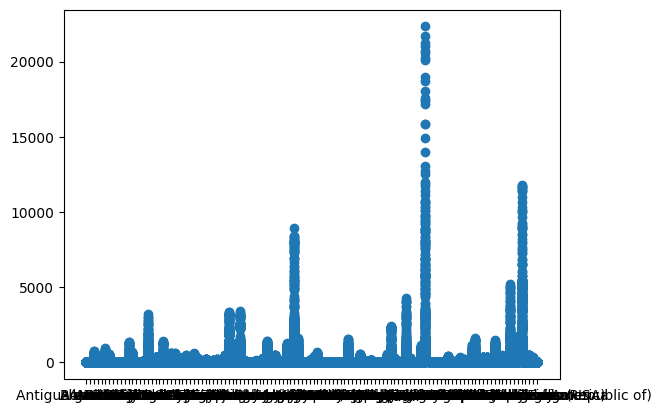

In [32]:
plt.scatter(fd.index, fd['suicides_no'])
#Too much data, look at it individually first

In [76]:
#country = fd[[fd.index,'suicides_no']] #Cursory reading of vendors and the ERP of their machines
country = fd.iloc[:, [3]]
#for col in country:
#    country[col] = country[col].assign(country[col].mean())
country

,suicides_no
country,
Albania,14.0
Albania,4.0
Albania,6.0
Albania,0.0
Albania,0.0
...,...
Virgin Islands (USA),2.0
Virgin Islands (USA),1.0
Virgin Islands (USA),0.0


In [89]:
idx = fd.index
idx.duplicated
country = country[idx.duplicated == 'False']
#country

<bound method Index.duplicated of Index(['Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania',
       'Albania', 'Albania', 'Albania', 'Albania',
       ...
       'Virgin Islands (USA)', 'Virgin Islands (USA)', 'Virgin Islands (USA)',
       'Virgin Islands (USA)', 'Virgin Islands (USA)', 'Virgin Islands (USA)',
       'Virgin Islands (USA)', 'Virgin Islands (USA)', 'Virgin Islands (USA)',
       'Virgin Islands (USA)'],
      dtype='object', name='country', length=36060)>

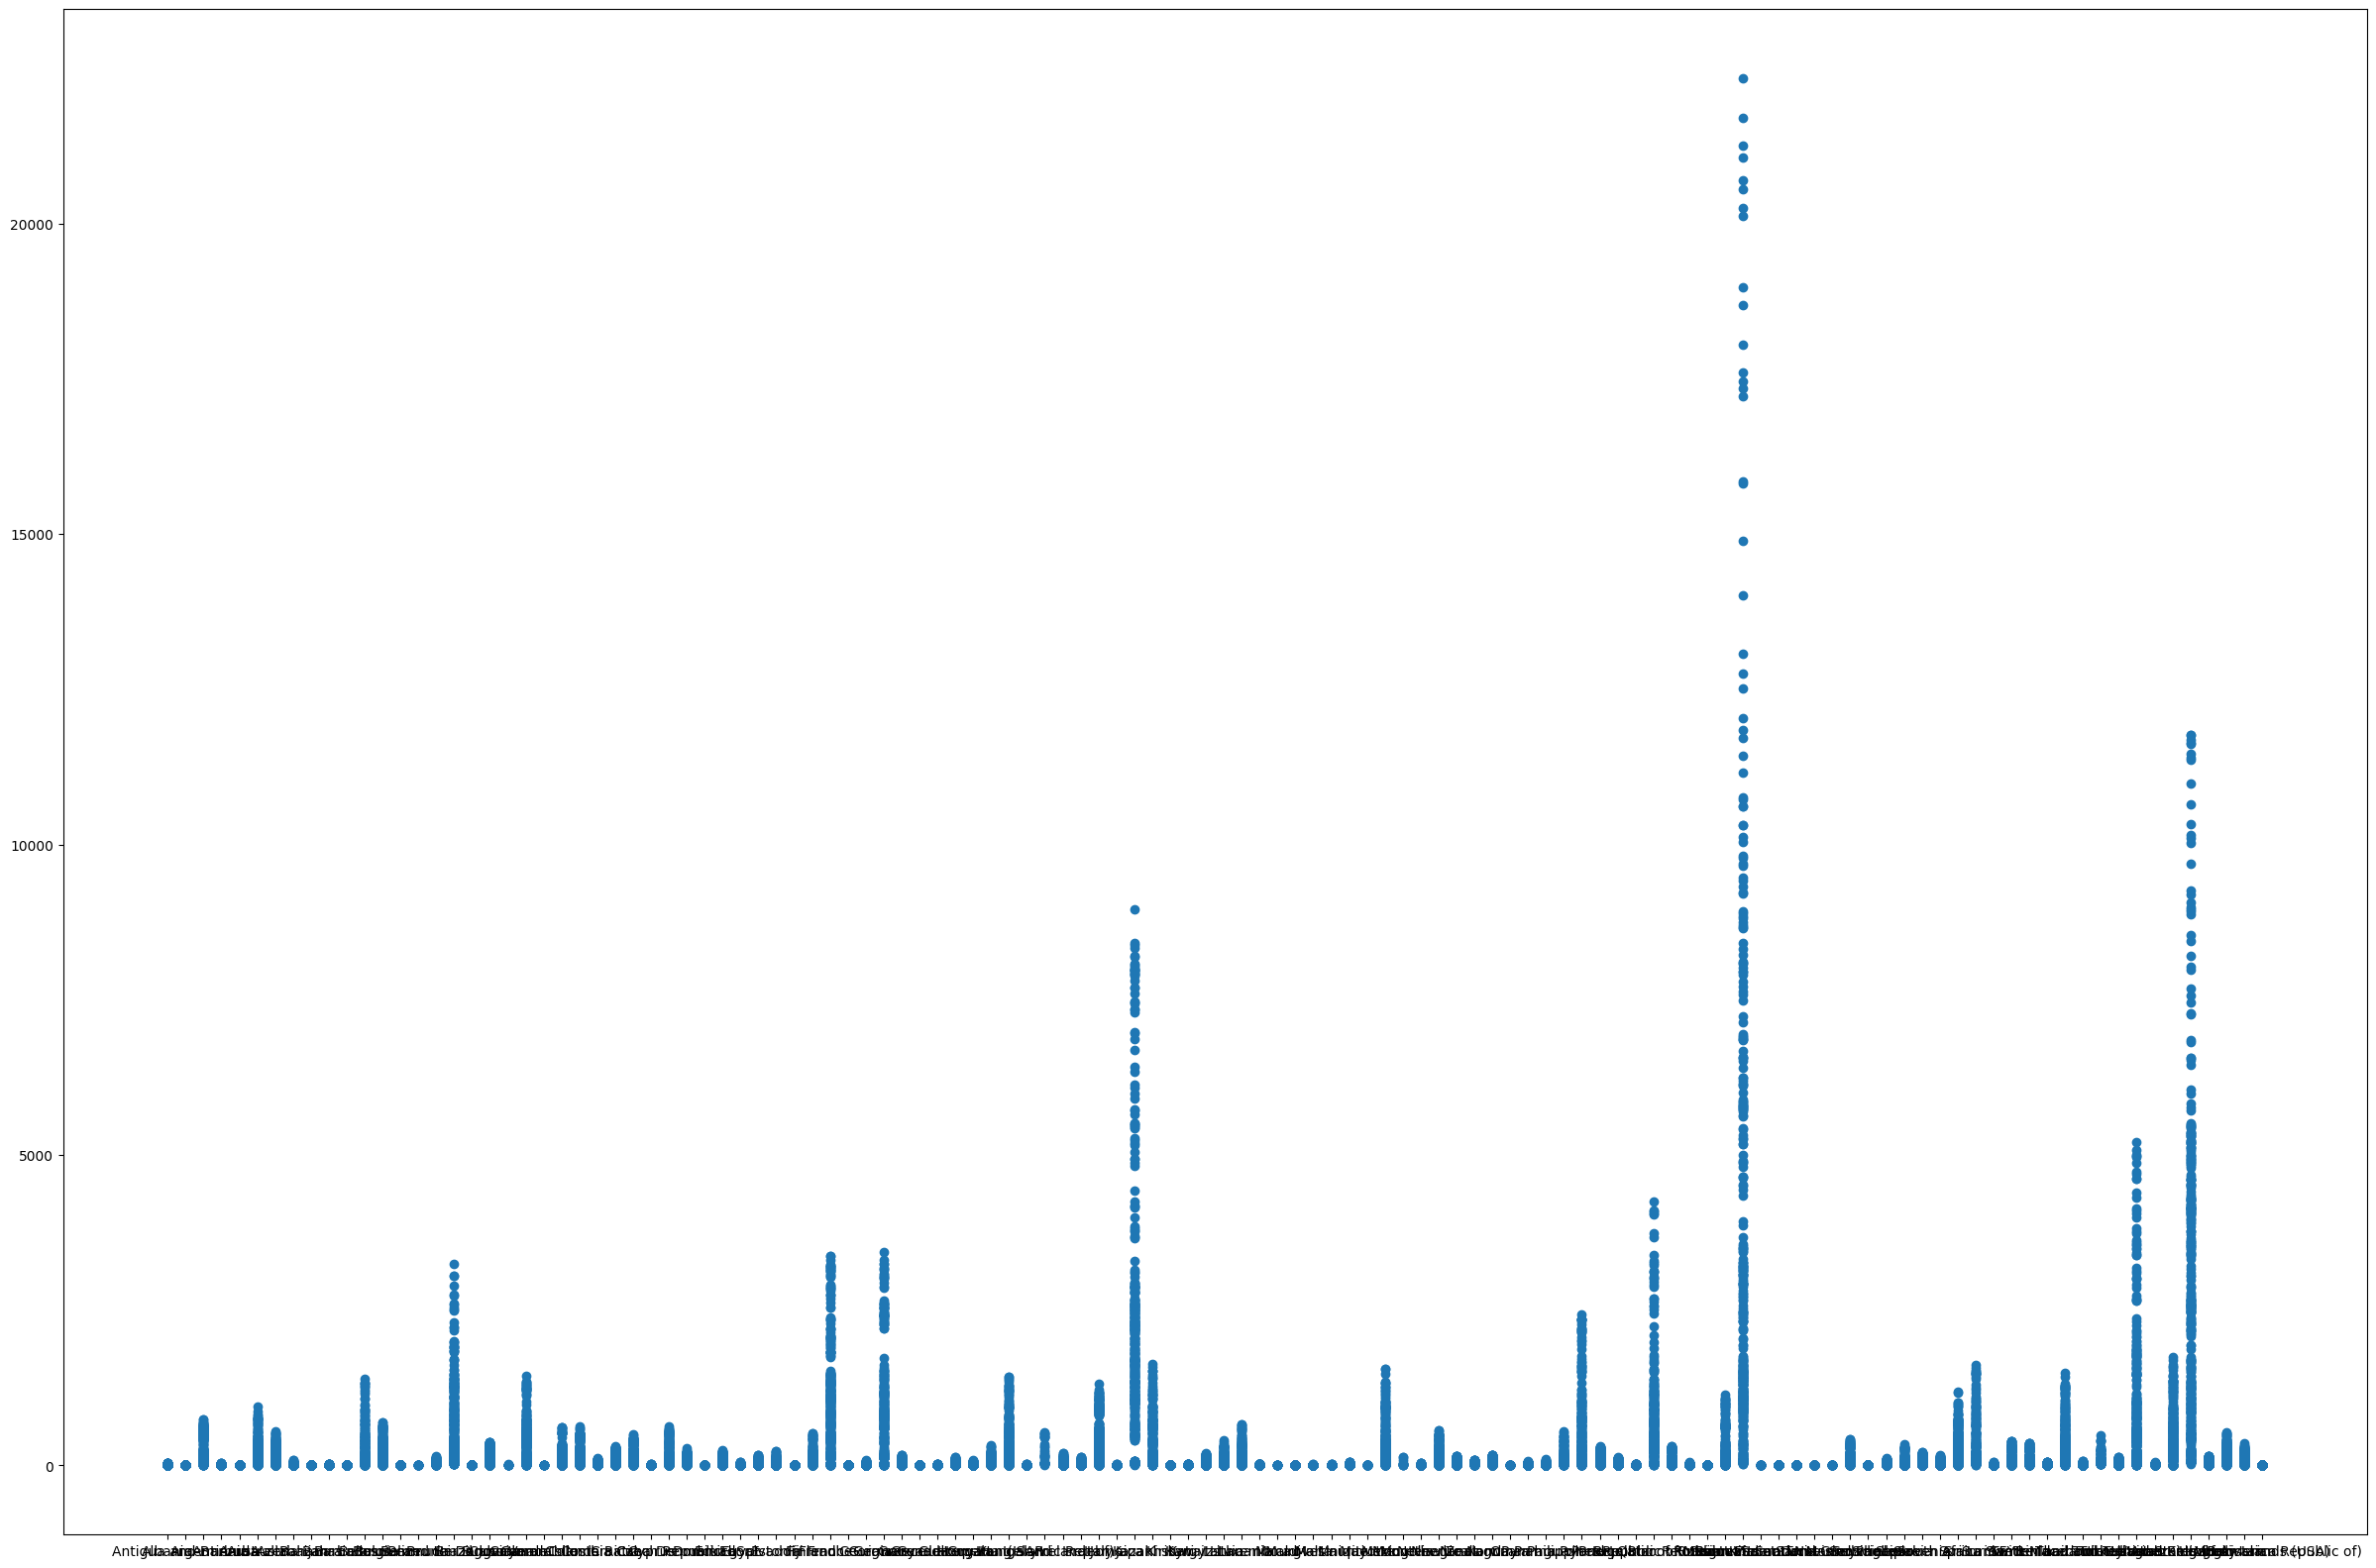

In [97]:
plt.figure(figsize=(30,20))
plt.scatter(fd.index, fd['suicides_no'])

In [ ]:
stats_available = who_suicide_stats['suicides_no'] != np.nan
print("Statistics are not available for these countries : ")
who_suicide_stats[stats_available]

In [ ]:
print("Suicide rates by sex")
sex
print("Suicide rates by age")
age

In [ ]:
who_suicide_stats['Albania']

In [ ]:
country = who_suicide_stats.groupby('country').mean()
country

